## Importing Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 50.1k/50.1k [00:00<00:00, 243kB/s]

Extracting files...
Path to dataset files: C:\Users\SHUBHAM\.cache\kagglehub\datasets\pavansubhasht\ibm-hr-analytics-attrition-dataset\versions\1


In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SHUBHAM\.cache\kagglehub\datasets\pavansubhasht\ibm-hr-analytics-attrition-dataset\versions\1\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
pd.unique(df['Gender'])

array(['Female', 'Male'], dtype=object)

In [21]:
df['WorkLifeBalance'].head(10)

0    1
1    3
2    3
3    3
4    3
5    2
6    2
7    3
8    3
9    2
Name: WorkLifeBalance, dtype: int64

In [26]:
Categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64']).columns

In [27]:

df['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})



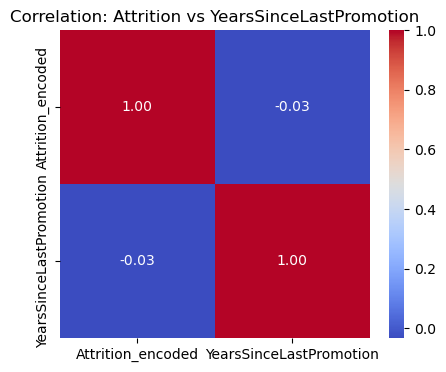

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the two columns
corr_matrix = df[['Attrition_encoded', 'YearsSinceLastPromotion']].corr()

# Plot it
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation: Attrition vs YearsSinceLastPromotion')
plt.show()


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [30]:
pd.unique(df['BusinessTravel'])

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [31]:
pd.unique(df['Department'])

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

## Encoding and Feature Rescaling

In [45]:
target_column = 'Attrition'
X = df.drop(columns=[target_column])
y = df[target_column]

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64']).columns

In [46]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])


## Logistic Regression 

In [36]:




from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = make_pipeline(preprocessor, LogisticRegression())  


model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.854875283446712


## XGB Regressor

In [44]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

xgb_model = make_pipeline(preprocessor, XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 Score (XGB):", r2_score(y_test, y_pred_xgb))


R2 Score (XGB): 0.9999999951634038
